# **Asteroid Prediction**


# Import Python Libraries

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt

# Reading the Income Classification Dataset

In [3]:
#%cd /content/drive/My Drive/Data

In [4]:
df = pd.read_csv('Asteroid.csv',  on_bad_lines='skip')

C:\Users\gilad\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (11,14,15,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Column Renaming

In [5]:
readable_df = df.copy()
readable_df = readable_df.rename(columns={"a": "semi-major axis",
                                        "e": "eccentricity",
                                        "G": "Magnitude slope parameter",
                                        "i": "Inclination with ecliptic plane",
                                        "om": "Longitude of the ascending node",
                                        "w": "argument of perihelion",
                                        "q": "perihelion distance(au)",
                                        "ad": "aphelion distance(au)",
                                        "per_y": "Orbital period",
                                        "data_arc": "data arc-span(d)",
                                        "condition_code": "Orbit condition code",
                                        "n_obs_used": "number of observations used",
                                        "H": "Absolute Magnitude parameter",
                                        })

In [6]:
readable_df.head()

,full_name,semi-major axis,eccentricity,Magnitude slope parameter,Inclination with ecliptic plane,Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


# **Exploration (EDA) & Visualization**

In [7]:
readable_df.shape

(839736, 27)

In [8]:
readable_df.isna().sum()

full_name                               0
semi-major axis                         2
eccentricity                            0
Magnitude slope parameter          839617
Inclination with ecliptic plane         0
Longitude of the ascending node         0
argument of perihelion                  0
perihelion distance(au)                 0
aphelion distance(au)                   6
Orbital period                          1
data arc-span(d)                    15789
Orbit condition code                  993
number of observations used             0
Absolute Magnitude parameter         2694
diameter                           702055
extent                             839718
albedo                             703284
rot_per                            820940
GM                                 839722
BV                                 838715
UB                                 838757
IR                                 839735
spec_B                             838070
spec_T                            

In [9]:
readable_df = readable_df.dropna(axis=0, subset=['diameter'])
readable_df.shape

(137681, 27)

In [10]:
readable_df.isna().sum()

full_name                               0
semi-major axis                         0
eccentricity                            0
Magnitude slope parameter          137562
Inclination with ecliptic plane         0
Longitude of the ascending node         0
argument of perihelion                  0
perihelion distance(au)                 0
aphelion distance(au)                   0
Orbital period                          0
data arc-span(d)                      140
Orbit condition code                    0
number of observations used             0
Absolute Magnitude parameter          751
diameter                                0
extent                             137665
albedo                               1232
rot_per                            126493
GM                                 137667
BV                                 136676
UB                                 136716
IR                                 137680
spec_B                             136311
spec_T                            

In [11]:
cleaned_df = readable_df.drop(["Magnitude slope parameter", 'spec_T', 'spec_B', "IR", "UB",
                               "BV", "GM", "rot_per", "extent"], axis=1)
cleaned_df.isna().sum()

full_name                             0
semi-major axis                       0
eccentricity                          0
Inclination with ecliptic plane       0
Longitude of the ascending node       0
argument of perihelion                0
perihelion distance(au)               0
aphelion distance(au)                 0
Orbital period                        0
data arc-span(d)                    140
Orbit condition code                  0
number of observations used           0
Absolute Magnitude parameter        751
diameter                              0
albedo                             1232
neo                                   0
pha                                   0
moid                                  0
dtype: int64

In [12]:
cleaned_df.shape

(137681, 18)

In [13]:
cleaned_df = cleaned_df.dropna()
cleaned_df.shape

(136044, 18)

In [14]:
cleaned_df.isna().sum()

full_name                          0
semi-major axis                    0
eccentricity                       0
Inclination with ecliptic plane    0
Longitude of the ascending node    0
argument of perihelion             0
perihelion distance(au)            0
aphelion distance(au)              0
Orbital period                     0
data arc-span(d)                   0
Orbit condition code               0
number of observations used        0
Absolute Magnitude parameter       0
diameter                           0
albedo                             0
neo                                0
pha                                0
moid                               0
dtype: int64

In [15]:
cleaned_df.dtypes

full_name                           object
semi-major axis                    float64
eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
argument of perihelion             float64
perihelion distance(au)            float64
aphelion distance(au)              float64
Orbital period                     float64
data arc-span(d)                   float64
Orbit condition code                object
number of observations used          int64
Absolute Magnitude parameter       float64
diameter                            object
albedo                             float64
neo                                 object
pha                                 object
moid                               float64
dtype: object

In [16]:
cleaned_df = cleaned_df.drop(['full_name'], axis=1)
cleaned_df.dtypes

semi-major axis                    float64
eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
argument of perihelion             float64
perihelion distance(au)            float64
aphelion distance(au)              float64
Orbital period                     float64
data arc-span(d)                   float64
Orbit condition code                object
number of observations used          int64
Absolute Magnitude parameter       float64
diameter                            object
albedo                             float64
neo                                 object
pha                                 object
moid                               float64
dtype: object

In [17]:
real_diameter_df = cleaned_df.astype({'diameter': 'float64', "Orbit condition code": "int32"})
real_diameter_df.dtypes

semi-major axis                    float64
eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
argument of perihelion             float64
perihelion distance(au)            float64
aphelion distance(au)              float64
Orbital period                     float64
data arc-span(d)                   float64
Orbit condition code                 int32
number of observations used          int64
Absolute Magnitude parameter       float64
diameter                           float64
albedo                             float64
neo                                 object
pha                                 object
moid                               float64
dtype: object

In [18]:
real_diameter_df.shape

(136044, 17)

## Dealing with Categorical variables
### neo and pha

In [19]:
categorical_data = real_diameter_df.select_dtypes(include=['object']).copy()
new_columns = pd.get_dummies(categorical_data, columns=['neo','pha'], drop_first=True)
new_columns

,neo_Y,pha_Y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
797871,0,0
797896,0,0
798113,0,0
799788,0,0


In [20]:
real_diameter_df = real_diameter_df.drop(['neo' , 'pha'], axis = 1)

In [21]:
model_df = pd.concat([real_diameter_df, new_columns], axis=1)
model_df.head()

,semi-major axis,eccentricity,Inclination with ecliptic plane,Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period,data arc-span(d),Orbit condition code,number of observations used,Absolute Magnitude parameter,diameter,albedo,moid,neo_Y,pha_Y
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,0.0900,1.59478,0,0
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,0.1010,1.23324,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,0.2140,1.03454,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,0.4228,1.13948,0,0
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,0.2740,1.09589,0,0


In [22]:
model_df.dtypes

semi-major axis                    float64
eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
argument of perihelion             float64
perihelion distance(au)            float64
aphelion distance(au)              float64
Orbital period                     float64
data arc-span(d)                   float64
Orbit condition code                 int32
number of observations used          int64
Absolute Magnitude parameter       float64
diameter                           float64
albedo                             float64
moid                               float64
neo_Y                                uint8
pha_Y                                uint8
dtype: object

# Asteroids


*   **imbalanced data**



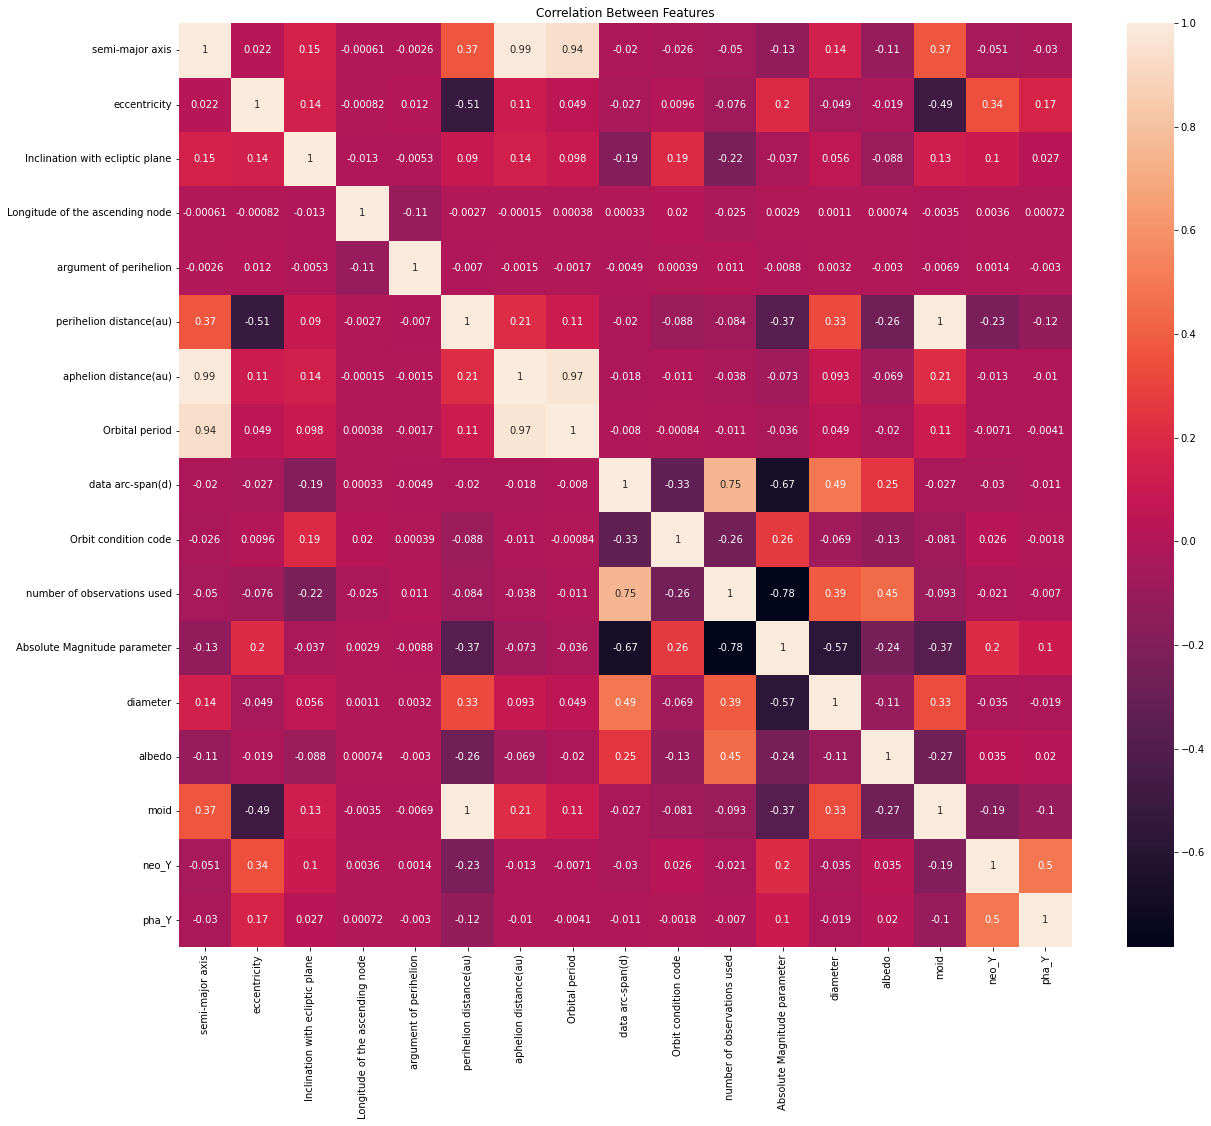

In [23]:
plt.figure(figsize=(20,17))
cor = model_df.corr()
sns.heatmap(model_df.corr(method='pearson'),annot=True)
plt.title("Correlation Between Features")
plt.show()

In [24]:
model_df['diameter'].value_counts()

4.017     45
3.111     44
3.296     44
3.537     44
3.126     44
          ..
10.787     1
18.379     1
1.052      1
18.494     1
1.077      1
Name: diameter, Length: 16596, dtype: int64

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = model_df['diameter']
X = model_df.drop('diameter', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [26]:
multi_reg = LinearRegression()
multi_reg.fit(X_train , y_train)
pred = multi_reg.predict(X_test)

In [27]:
print('Training Accuracy : ' , multi_reg.score(X_train, y_train))
print('Test Accuracy : ' , multi_reg.score(X_test, y_test))

Training Accuracy :  0.4944891684467058
Test Accuracy :  0.36855821339068556


## Random Forest Regression

In [28]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [29]:
print('Training Accuracy : ' , multi_reg.score(X_train, y_train))
print('Test Accuracy : ' , multi_reg.score(X_test, y_test))

Training Accuracy :  0.4944891684467058
Test Accuracy :  0.36855821339068556
